# Coding extensions

## position + velocity with random acceleration adding into the Kalman filter

Code:

In [22]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

dt = 1.0
num_steps = 50

true_position = 0.0
true_velocity = 0.0
acceleration = 0.2

true_positions = []
measurements = []

measurement_noise_std = 2.0

for _ in range(num_steps):
    accel = np.random.normal(0, acceleration)
    true_velocity += accel * dt
    true_position += true_velocity * dt
    
    true_positions.append(true_position)
    measurements.append(true_position + np.random.normal(0, measurement_noise_std))

Kalman Filter setup

In [14]:
x_est = np.array([[0.0], [0.0]])

P = np.eye(2) * 10.0

F = np.array([[1, dt], [0, 1]])

H = np.array([[1, 0]])

Q = np.array([[0.1, 0], [0, 0.1]])

R = np.array([[measurement_noise_std ** 2]])


Prediction and Update parts

In [15]:

kf_positions = []
pred_only_positions = []

x_pred = x_est.copy()

for z in measurements:
    # if prediction only
    x_pred = F @ x_pred
    pred_only_positions.append(x_pred[0, 0])
    
    # kalman prediction
    x_est = F @ x_est
    P = F @ P @ F.T + Q
    
    # Update
    y = np.array([[z]]) - H @ x_est
    S = H @ P @ H.T + R
    K = P @ H.T @ np.linalg.inv(S)
    
    x_est = x_est + K @ y
    P = (np.eye(2) - K @ H) @ P
    
    kf_positions.append(x_est[0, 0])


Graph generation

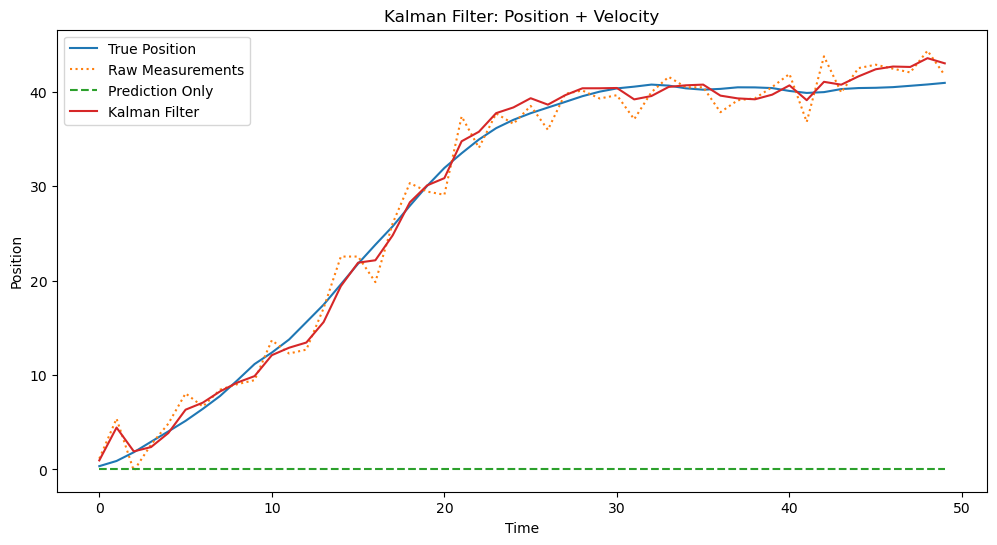

In [26]:

plt.figure(figsize=(12,6))
plt.plot(true_positions, label="True Position")
plt.plot(measurements, label="Raw Measurements", linestyle='dotted')
plt.plot(pred_only_positions, label="Prediction Only", linestyle='--')
plt.plot(kf_positions, label="Kalman Filter")
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()
plt.title("Kalman Filter: Position + Velocity")
plt.show()